<a href="https://colab.research.google.com/github/gaurangdave/mnist_digits_recognition/blob/main/notebooks/01_explore_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

* In this notebook we explore the data and identify required transformation for accurate classification.
* We also need to split the train/test to avoid any data snooping.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
from google.colab import userdata
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

## Mount Google Drive

In [2]:
## mount google drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Retrieve the Google Drive path stored in secrets
shared_folder_path = userdata.get("SHARED_DRIVE_PATH")

## Access MNIST Dataset from Google Drvie

In [4]:
raw_data_csv = f"{shared_folder_path}/raw_mnist_data.csv"

mnist = pd.read_csv(raw_data_csv)

In [5]:
mnist.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


## Quick Data Exploration

In [6]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: int64(785)
memory usage: 419.2 MB


In [7]:
mnist.isna().sum()

,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
pixel5,0
...,...
pixel781,0
pixel782,0
pixel783,0
pixel784,0


Observations:
* Looks like no missing values since `isna().sum()` returns 0s and all dtypes is `int64`

Lets check how the class is distributed

In [8]:
# plotting class distribution to understand and verify the train/test split
class_counts = mnist["class"].value_counts().sort_index()

# Convert to a DataFrame for visualization
class_distribution = pd.DataFrame({
    "Digit": class_counts.index,
    "Count": class_counts.values
})

# Plot using Plotly
fig = px.bar(
    class_distribution,
    x="Digit",
    y="Count",
    title="Class Distribution in MNIST Dataset",
    labels={"Digit": "Digit Class", "Count": "Number of Instances"},
    text="Count"
)

# Add count labels on bars
fig.update_traces(textposition="outside")

# Show plot
fig.show()

Observations:
* So we have `Class 1` which occurs slightly more than rest of the classes, lets calculate the percentages and then create stratified split.

In [9]:
class_distribution["Percent"] = (class_distribution["Count"] / class_distribution["Count"].sum()) * 100

In [10]:
class_distribution

,Digit,Count,Percent
0,0,6903,9.861429
1,1,7877,11.252857
2,2,6990,9.985714
3,3,7141,10.201429
4,4,6824,9.748571
5,5,6313,9.018571
6,6,6876,9.822857
7,7,7293,10.418571
8,8,6825,9.750000
9,9,6958,9.940000


## Stratified Split

In [11]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [12]:
for train_idx, test_idx in splitter.split(mnist, mnist["class"]):
    mnist_train_set = mnist.iloc[train_idx].reset_index(drop=True)
    mnist_test_set = mnist.iloc[test_idx].reset_index(drop=True)

* Lets verify if train and test set have similar class distribution

In [13]:
## verifying training data class distribution
(mnist_train_set["class"].value_counts().sort_index() / mnist_train_set.shape[0]) * 100

,count
class,
0,9.860714
1,11.253571
2,9.985714
3,10.201786
4,9.748214
5,9.017857
6,9.823214
7,10.417857
8,9.750000


Observations:
* The distribution is more or less similar to main dataset

In [14]:
## verifying test data class distribution
(mnist_test_set["class"].value_counts().sort_index() / mnist_test_set.shape[0]) * 100

,count
class,
0,9.864286
1,11.250000
2,9.985714
3,10.200000
4,9.750000
5,9.021429
6,9.821429
7,10.421429
8,9.750000


Observations:
* Even the test set distribution matches the dataset. We can now save the train/test dataframes to google drive

## Saving Test/Train set to Google Drive

In [15]:
train_set_path = f"{shared_folder_path}/mnist_train_set.csv"
test_set_path = f"{shared_folder_path}/mnist_test_set.csv"

In [16]:
mnist_train_set.to_csv(train_set_path, index=False)
mnist_test_set.to_csv(test_set_path, index=False)

## Data Exploration

In [17]:
## verifying training data class distribution
(mnist_train_set["class"].value_counts().sort_index() / mnist_train_set.shape[0]) * 100

,count
class,
0,9.860714
1,11.253571
2,9.985714
3,10.201786
4,9.748214
5,9.017857
6,9.823214
7,10.417857
8,9.750000


Observation:
* So the class distribution is more or less even, so we shouldn't face any issue of unrepresentation or over representation of any particular class

In [18]:
mnist_train_set.shape

(56000, 785)

In [19]:
mnist_train_set.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
# Calculate aggregated statistics
pixel_stats = mnist_train_set.iloc[:, :-1].aggregate(['min', 'max', 'mean', 'std']).T

# Summary for all pixels combined
overall_stats = {
    "min_pixel_value": mnist_train_set.iloc[:, :-1].min().min(),
    "max_pixel_value": mnist_train_set.iloc[:, :-1].max().max(),
    "mean_pixel_value": mnist_train_set.iloc[:, :-1].mean().mean(),
    "std_pixel_value": mnist_train_set.iloc[:, :-1].std().mean()
}

print("Overall Pixel Value Stats:", overall_stats)

Overall Pixel Value Stats: {'min_pixel_value': 0, 'max_pixel_value': 255, 'mean_pixel_value': 33.40283570973032, 'std_pixel_value': 49.25044784975305}


Observations:
* Our mean is ~33 which is more closer to 0 than to max value 255, which tells us that majority of the pixels are 0 or closer to 0, i.e. black and there are fewer white pixels which might be representing the actual numbers
* Lets create a function to render the images based on pixels passed

In [21]:
def show_digit(image_data, label):
  image_data = image_data.reshape(28, 28)  # MNIST images are 28x28 pixels
  # Render the image using Matplotlib
  plt.imshow(image_data, cmap="gray")  # Use 'gray' colormap to render grayscale
  plt.title(f"Rendered Image - Label: {label}")  # Display the label as the title
  plt.axis("off")  # Remove axes for better visualization
  plt.show()

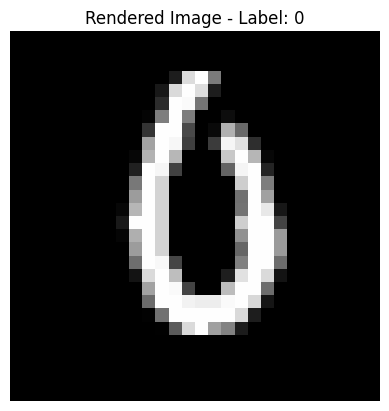

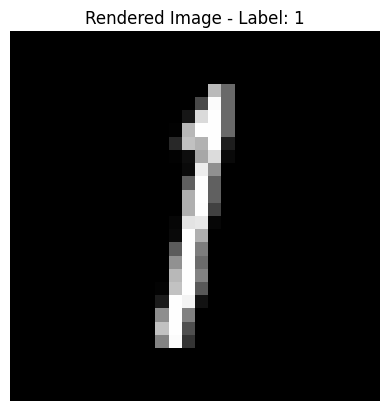

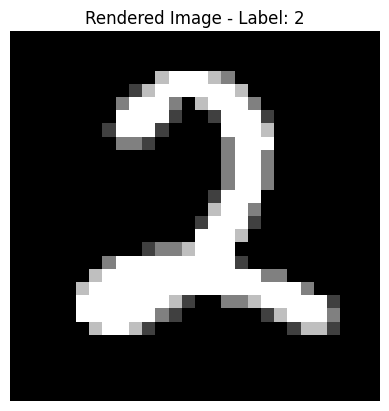

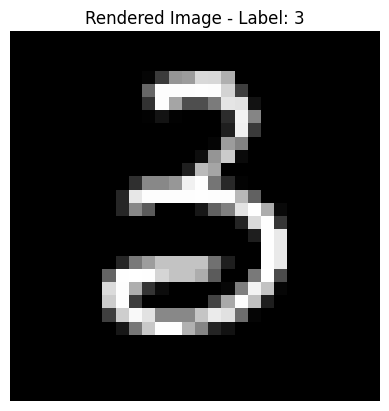

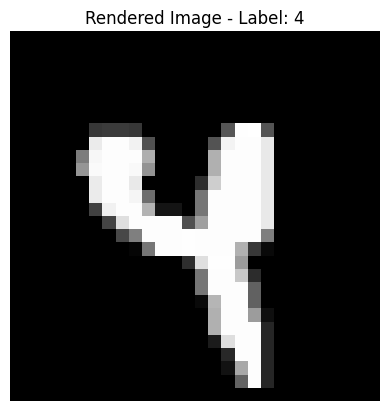

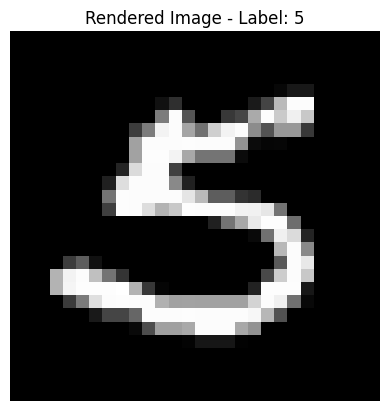

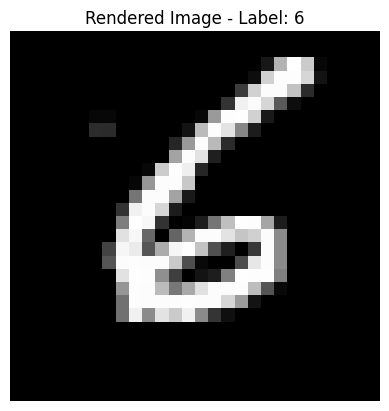

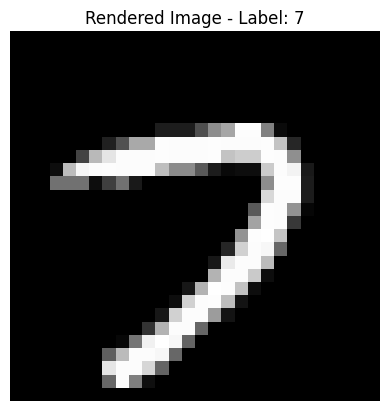

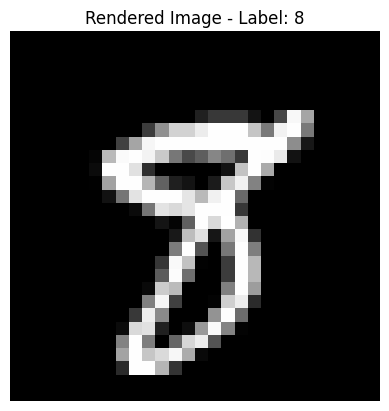

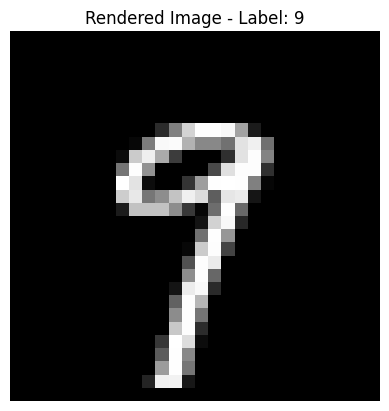

In [27]:
## lets render every unique class
for digit in range(10):
  ## get a random row that matches the digit
  random_row = mnist_train_set[mnist_train_set["class"] == digit].sample(1)
  image_data = random_row.iloc[0, :-1].values
  label = digit
  show_digit(image_data=image_data, label=label)


